In [1]:
from datasets import load_from_disk
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import re

/home1/am59710/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_from_disk('../../../eval_outputs/baseline_ibm-granite/granite-3.3-2b-instruct_medmcqa_train_40000_4options')
ds

Dataset({
    features: ['id', 'question', 'opa', 'opb', 'opc', 'opd', 'cop', 'choice_type', 'exp', 'subject_name', 'topic_name', 'prompt', 'correct_answer', 'model_response', 'model_answer'],
    num_rows: 40000
})

In [3]:
df = ds.to_pandas()

In [4]:
df.columns

Index(['id', 'question', 'opa', 'opb', 'opc', 'opd', 'cop', 'choice_type',
       'exp', 'subject_name', 'topic_name', 'prompt', 'correct_answer',
       'model_response', 'model_answer'],
      dtype='object')

Ground truth:
correct_answer
A       11669
B       10432
C        9449
D        8450
E           0
None        0
Name: count, dtype: int64
Total: 40000

Model answers:
model_answer
A        9989
B        9576
C        9381
D       10658
E           0
None      396
Name: count, dtype: int64
Total 40000

Model's correct answers:
A       5365
B       4669
C       4275
D       4272
E          0
None       0
dtype: int64

Model's incorrect answers:
model_answer
A       4624
B       4907
C       5106
D       6386
E          0
None     396
dtype: int64



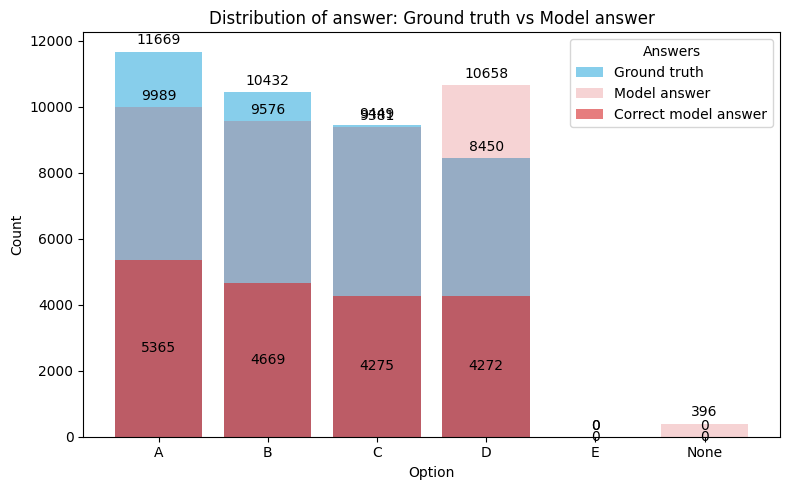

In [5]:
order = ['A','B','C','D', 'E', 'None']
plt.figure(figsize=(8,5))


truth_norm = df['correct_answer'].fillna('None')
pred_norm = df['model_answer'].fillna('None')

counts_truth = truth_norm.value_counts().reindex(order, fill_value=0)
categories = counts_truth.index.sort_values()
print("Ground truth:", counts_truth, sep = "\n")
print("Total:", sum(counts_truth))
print()
bar_truth = plt.bar(categories, counts_truth, color='skyblue',  alpha=1.0, label='Ground truth')
plt.bar_label(bar_truth, labels=[f"{v:d}" for v in counts_truth.values], padding=3) 


counts_pred = pred_norm.value_counts().reindex(order, fill_value=0)
categories = counts_pred.sort_index().index
print("Model answers:", counts_pred, sep = "\n")
print("Total", sum(counts_pred))
print()
bar_pred = plt.bar(categories, counts_pred, color='tab:red',alpha=0.2, label='Model answer')
plt.bar_label(bar_pred, labels=[f"{v:d}" for v in counts_pred.values], padding=3)


match_counts = pd.Series({opt: ((pred_norm == opt) & (truth_norm == opt)).sum() for opt in order})
mismatch_counts = (counts_pred - match_counts).clip(lower=0)
print("Model's correct answers:", match_counts, sep = "\n")
print()
print("Model's incorrect answers:", mismatch_counts, sep = "\n")
print()

bar_pred = plt.bar(categories, match_counts.values, color='tab:red', alpha=0.6, label='Correct model answer')

plt.bar_label(bar_pred, labels=[f"{int(v)}" for v in match_counts.values], label_type='center')



plt.xlabel('Option')
plt.ylabel('Count')
plt.title('Distribution of answer: Ground truth vs Model answer')
plt.legend(title='Answers')
plt.tight_layout()
plt.show()